
# Implementation of Batch Gradient Descent& Stochastic Gradient Descent

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('Downloads/houseprices_bangalore.csv')
df.sample(5)

,area,bedrooms,price
14,2250,3,101.0
15,1175,2,42.0
17,1540,3,60.0
4,1200,2,51.0
8,1310,3,50.0


# Scaling 

In [9]:
from sklearn import preprocessing

sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

scaled_X=sx.fit_transform(df.drop('price',axis='columns'))
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [10]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [17]:
w=np.ones(shape=(2))

In [ ]:
a=np.array([1,2,3])
b=np.

In [29]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        y_predicted = np.dot(w,scaled_X.T) +b  # w1 *area +w2 *bedrooms
        
        w_grad=-(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad=-(2/total_samples)*np.sum(y_true-y_predicted)
        
        w=w-learning_rate * w_grad
        b=b-learning_rate * b_grad
        
        cost=np.mean(np.square(y_true-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
        
w,b,cost
    

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

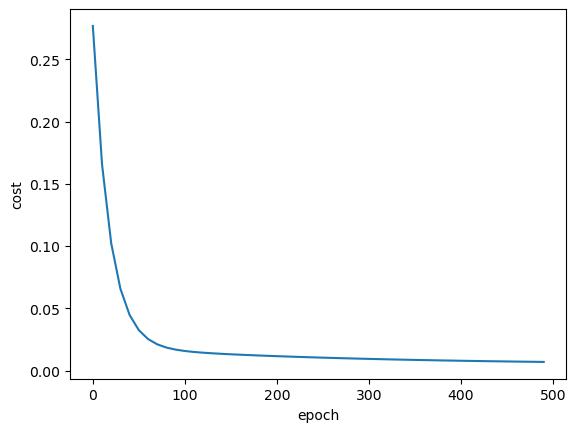

In [30]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

# Prediction Function

In [31]:
sx.transform([[2600,4]])

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [32]:
sy.inverse_transform([[1,0.5,0]])

array([[167. ,  99.5,  32. ]])

In [35]:
def predict(area,bedrooms,w,b):
    scaled_X=sx.transform([[area,bedrooms]])[0]
    
    scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    
    return sy.inverse_transform([[scaled_price]])[0][0]


predict(2600,4,w,b)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [36]:
predict(1000,2,w,b)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442363

In [37]:
predict(1500,3,w,b)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [39]:
predict(1500,3,w,b)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

In [40]:
predict(1500,4,w,b)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


92.24518560116454

# STOCHASTIC GRADIENT DESCENT


In [45]:
import random
random.randint(0,6)

3

In [62]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_index=random.randint(0,total_samples-1)
        sample_x=X[random_index]
        sample_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w=w-learning_rate * w_grad
        b=b-learning_rate * b_grad
        
        cost=np.mean(np.square(sample_y-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd,b_sgd,cost_sgd,cost_list_sgd,epoch_list_sgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),2000)
        
w_sgd,b_sgd,cost_sgd
        

(array([0.82291706, 0.79038561]), -0.3019889280829538, 0.017363327024298467)

In [63]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

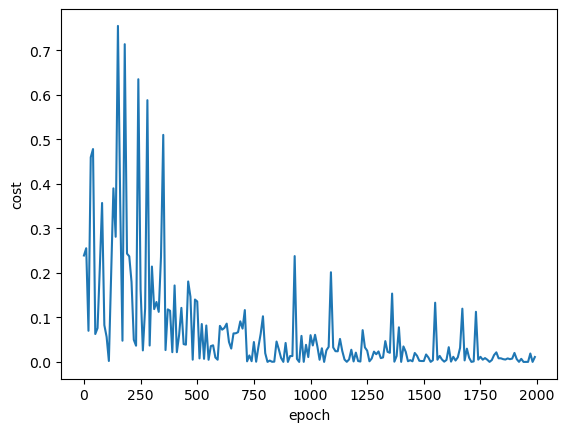

In [64]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [53]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.57418053345236

In [54]:
predict(1500,3,w_sgd,b_sgd)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.66570568090523

Exercise: Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch
    GD and stochastic GD. In stochastic we used one randomly picked training sample, in mini gradient descent you will use a batch of samples
    in each iterations. For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulative 
    error for those 10 samples and then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights 
    after going through all samples but in mini batch we do after every m samples(where m is batch size and it is 0<m<n, 
                                                                                 where n is total number of samples)

# Mini Batch Gradient Descent

In [73]:
def mini_batch_gradient_descent(X,y_true,epochs,batch_size,learning_rate=0.01):
    
    number_of_features=X.shape[1]
    w=np.ones(shape=(number_of_features))
    b=0
    total_samples=X.shape[0]
    
    cost_list=[]
    epoch_list=[]
    
    for i in range(epochs):
        random_index=random.sample(range(total_samples),batch_size)
        batch_x=X[random_index]
        batch_y=y_true[random_index]
        y_predicted=np.dot(w,sample_x.T)+b
        w_grad=-(2/total_samples)*(batch_x.T.dot(batch_y-y_predicted))
        b_grad=-(2/total_samples)*np.sum(batch_y-y_predicted)
        
        w=w-learning_rate * w_grad
        b=b-learning_rate * b_grad
        
        cost=np.mean(np.square(batch_y-y_predicted))
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_mbgd,b_mbgd,cost_mbgd,cost_list_mbgd,epoch_list_mbgd=stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
        
w_mbgd,b_mbgd,cost_mbgd
        

(array([0.70539484, 0.6756928 ]), -0.2298151660444562, 0.052920799221685126)

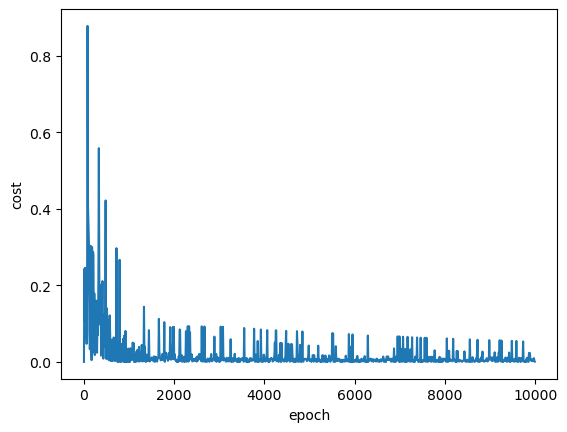

In [74]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_mbgd,cost_list_mbgd)

In [75]:
predict(2600,4,w_mbgd,b_mbgd)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.49607183039188

In [78]:
predict(1310,3,w_sgd,b_sgd)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


64.11970933615656

In [79]:
predict(1100,2,w_sgd,b_sgd)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


29.39947138798771

In [80]:
predict(2250,3,w_sgd,b_sgd)

C:\Users\KIRAN\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


100.12942497122951